#ANN for MNIST DATASET

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [2]:

# 1. Import MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# 2. Perform EDA
# Display basic information about the dataset
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Number of training samples: {len(x_train)}')
print(f'Number of testing samples: {len(x_test)}')


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

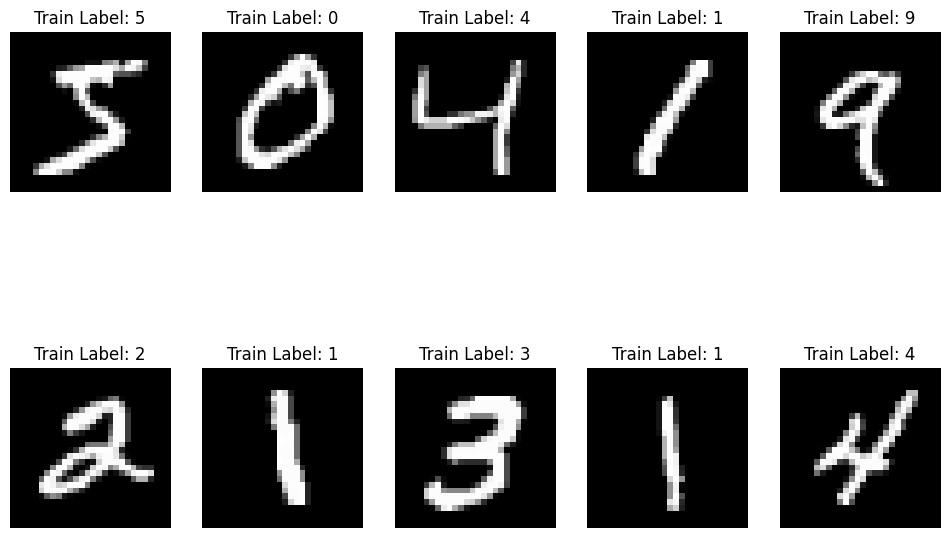

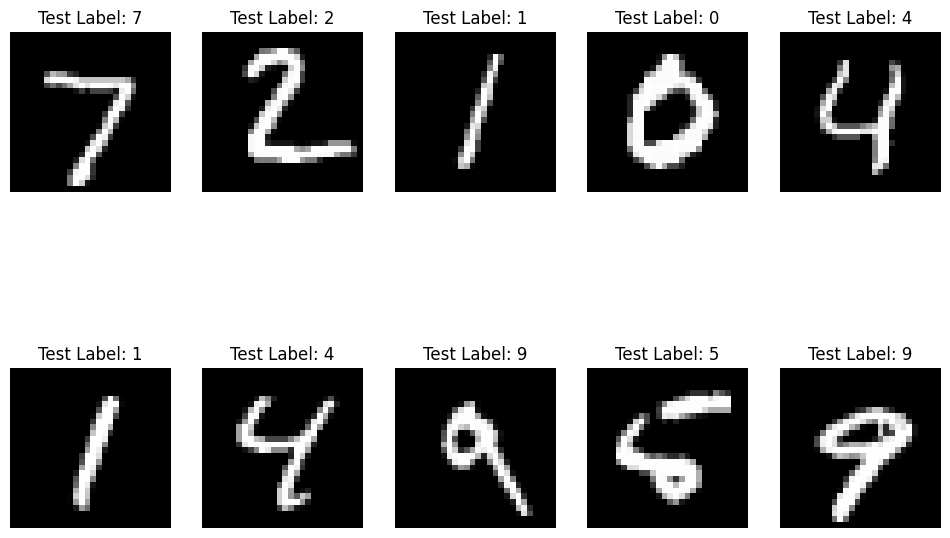

In [ ]:

# 3. Explain and show a sample from each of the sets (train, test, ytrain, ytest)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Train Label: {y_train[i]}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Test Label: {y_test[i]}')
    plt.axis('off')
plt.show()


In [ ]:

# # 4. Show and explain class distribution in dataset in details
# plt.figure(figsize=(12, 12))
# sns.countplot(y_train)
# plt.title('Distribution of training labels')
# plt.xlabel('Digit')
# plt.ylabel('Count')
# plt.show()


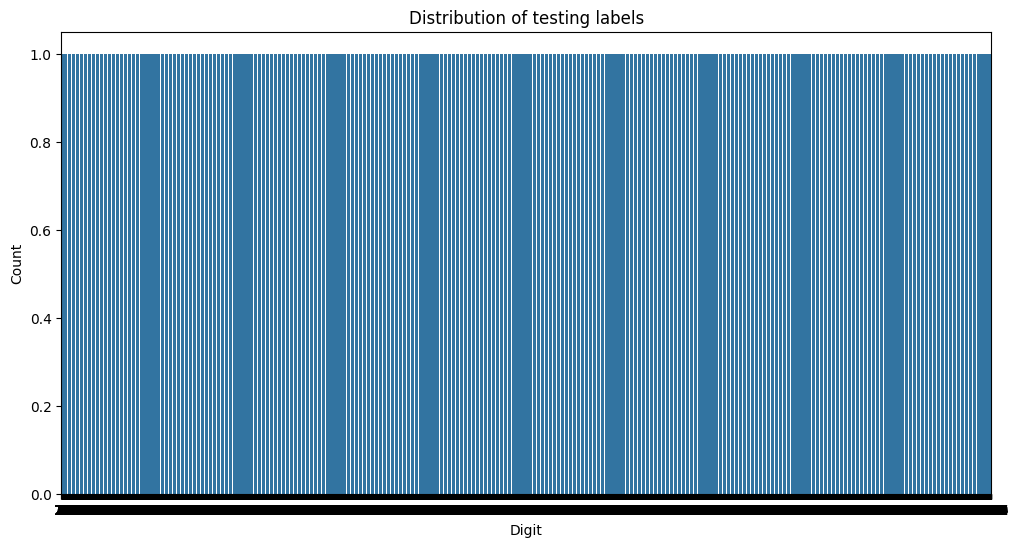

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(y_test)
plt.title('Distribution of testing labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()


In [3]:

# 5. Perform data preprocessing
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:

# 6. Transform labels and explain why it's necessary, also show and explain how labels looked before and after
# Print first 10 labels before transformation
print("First 10 labels before transformation:", y_train[:10])


First 10 labels before transformation: [5 0 4 1 9 2 1 3 1 4]


In [5]:

# Convert class labels to one-hot encoded vectors
# This transformation is necessary because the output layer of the neural network has 10 neurons (one for each class).
# The one-hot encoding transforms the labels into a binary matrix representation. This helps the model understand
# the correct class for each input and calculate the loss correctly during training.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:

# Print first 10 labels after transformation
print("First 10 labels after transformation:")
print(y_train[:10])


First 10 labels after transformation:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [6]:

# 7. Build ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:

# 8. Compile the model with proper comments
# optimizer='adam': Adam optimizer is chosen for its efficiency and adaptive learning rate.
# loss='categorical_crossentropy': Appropriate loss function for multi-class classification problems.
# metrics=['accuracy']: Accuracy is used as the metric to evaluate model performance.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
x_train.shape

(60000, 28, 28)

##TYPES OF GRADIENT DESCENT WE CAN USE HERE:
 - Batch Gradient
 - Stochastic Gradient
 - mini-Batch Gradient


## HERE IS HOW TO IMPLEMENT EACH OF THESE IN TENSORFLOW:
 - FOR **BATCH GRADIENT** >>> BATCH SIZE = TRAINING DATA SIZE = 48000
 - FOR **STOCASTIC** >>> BATCH SIZE = 1
 - FOR **MINI-BATCH** >>> BATCH SIZE = e.g., 32, 64, 128, 200

## **1.BATCH GRADIENT:**

In [ ]:

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=48000, verbose=2)


Epoch 1/50
1/1 - 4s - 4s/step - accuracy: 0.1548 - loss: 2.3265 - val_accuracy: 0.2707 - val_loss: 2.2228
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.2742 - loss: 2.2209 - val_accuracy: 0.3602 - val_loss: 2.1234
Epoch 3/50
1/1 - 0s - 238ms/step - accuracy: 0.3630 - loss: 2.1231 - val_accuracy: 0.4334 - val_loss: 2.0287
Epoch 4/50
1/1 - 0s - 248ms/step - accuracy: 0.4341 - loss: 2.0293 - val_accuracy: 0.4917 - val_loss: 1.9340
Epoch 5/50
1/1 - 0s - 244ms/step - accuracy: 0.4882 - loss: 1.9356 - val_accuracy: 0.5392 - val_loss: 1.8379
Epoch 6/50
1/1 - 0s - 284ms/step - accuracy: 0.5324 - loss: 1.8406 - val_accuracy: 0.5717 - val_loss: 1.7403
Epoch 7/50
1/1 - 0s - 312ms/step - accuracy: 0.5659 - loss: 1.7444 - val_accuracy: 0.6005 - val_loss: 1.6420
Epoch 8/50
1/1 - 0s - 294ms/step - accuracy: 0.5947 - loss: 1.6475 - val_accuracy: 0.6288 - val_loss: 1.5443
Epoch 9/50
1/1 - 0s - 298ms/step - accuracy: 0.6195 - loss: 1.5512 - val_accuracy: 0.6522 - val_loss: 1.4483
Epoch 10/50
1/1 - 0s - 28

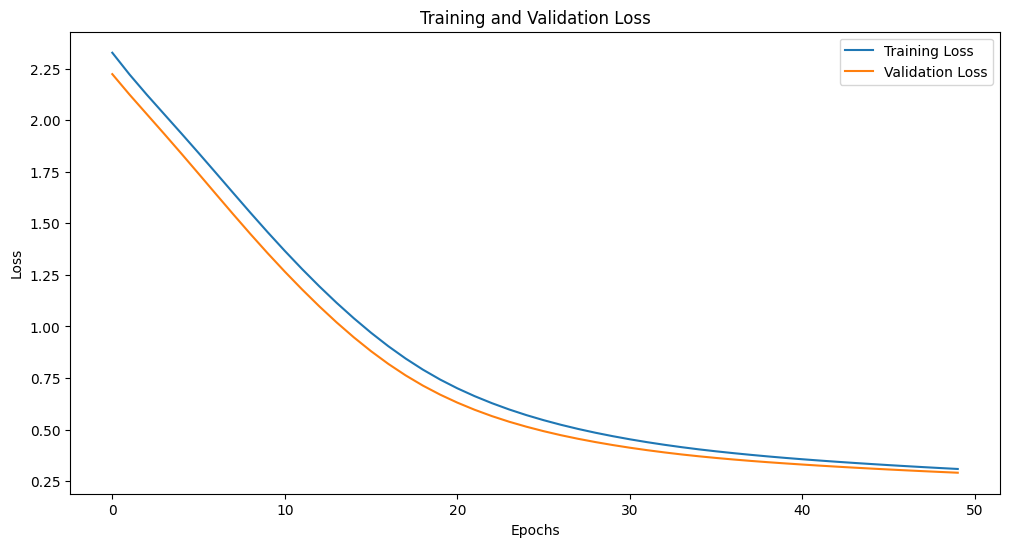

In [ ]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Explanation of the graph
"""
The training and validation loss are plotted over the epochs. The early stopping technique helps prevent overfitting by stopping
the training process when the validation loss stops improving. This ensures that the model does not continue to train on the
training data, potentially memorizing it, which would lead to poor generalization on unseen data. The point where the validation
loss stops decreasing indicates the optimal number of epochs for training.
"""

## **2.STOCASTIC GRADIENT:**

In [ ]:

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=1, verbose=2)


Epoch 1/50
48000/48000 - 142s - 3ms/step - accuracy: 0.9301 - loss: 0.2390 - val_accuracy: 0.9571 - val_loss: 0.1557
Epoch 2/50
48000/48000 - 184s - 4ms/step - accuracy: 0.9570 - loss: 0.1562 - val_accuracy: 0.9669 - val_loss: 0.1351
Epoch 3/50
48000/48000 - 142s - 3ms/step - accuracy: 0.9653 - loss: 0.1374 - val_accuracy: 0.9645 - val_loss: 0.1830
Epoch 4/50
48000/48000 - 140s - 3ms/step - accuracy: 0.9693 - loss: 0.1317 - val_accuracy: 0.9567 - val_loss: 0.2462
Epoch 5/50
48000/48000 - 141s - 3ms/step - accuracy: 0.9713 - loss: 0.1242 - val_accuracy: 0.9613 - val_loss: 0.1912
Epoch 6/50
48000/48000 - 161s - 3ms/step - accuracy: 0.9734 - loss: 0.1192 - val_accuracy: 0.9599 - val_loss: 0.2111
Epoch 7/50
48000/48000 - 142s - 3ms/step - accuracy: 0.9740 - loss: 0.1165 - val_accuracy: 0.9532 - val_loss: 0.3076
Epoch 8/50
48000/48000 - 201s - 4ms/step - accuracy: 0.9756 - loss: 0.1100 - val_accuracy: 0.9670 - val_loss: 0.2479
Epoch 9/50
48000/48000 - 123s - 3ms/step - accuracy: 0.9776 - lo

In [ ]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##**3.MINI-BATCH GRADIENT:**

In [8]:

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=200, verbose=2)


Epoch 1/50
240/240 - 2s - 9ms/step - accuracy: 0.8774 - loss: 0.4371 - val_accuracy: 0.9408 - val_loss: 0.2106
Epoch 2/50
240/240 - 1s - 4ms/step - accuracy: 0.9489 - loss: 0.1780 - val_accuracy: 0.9578 - val_loss: 0.1475
Epoch 3/50
240/240 - 2s - 6ms/step - accuracy: 0.9627 - loss: 0.1272 - val_accuracy: 0.9633 - val_loss: 0.1269
Epoch 4/50
240/240 - 1s - 5ms/step - accuracy: 0.9703 - loss: 0.0991 - val_accuracy: 0.9654 - val_loss: 0.1131
Epoch 5/50
240/240 - 1s - 5ms/step - accuracy: 0.9766 - loss: 0.0795 - val_accuracy: 0.9694 - val_loss: 0.1019
Epoch 6/50
240/240 - 1s - 6ms/step - accuracy: 0.9802 - loss: 0.0659 - val_accuracy: 0.9701 - val_loss: 0.0973
Epoch 7/50
240/240 - 1s - 4ms/step - accuracy: 0.9841 - loss: 0.0550 - val_accuracy: 0.9707 - val_loss: 0.0976
Epoch 8/50
240/240 - 1s - 5ms/step - accuracy: 0.9871 - loss: 0.0448 - val_accuracy: 0.9716 - val_loss: 0.0937
Epoch 9/50
240/240 - 1s - 5ms/step - accuracy: 0.9885 - loss: 0.0384 - val_accuracy: 0.9724 - val_loss: 0.0965
E

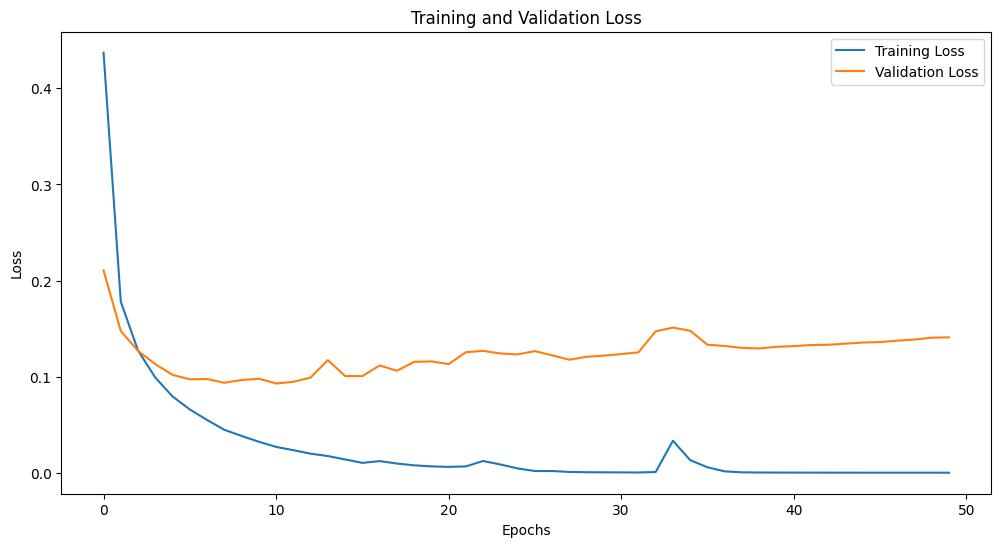

In [9]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




###  What **Batch Size** Really Means:

When you train your model using:

```python
model.fit(x_train, y_train, batch_size=200, epochs=1)
```

Here’s what happens step by step:

---

###  1. Split Data into Mini-Batches

- You have **48,000 training samples** (after validation split).
- With `batch_size=200`, the data is split into:
  
  $[
  \frac{48000}{200} = 240 \text{ mini-batches}
  ]$

---

###  2. For Each Mini-Batch:
- The model **takes 200 samples**
- **Runs forward pass** (predicts outputs)
- **Computes loss**
- **Performs backpropagation**
- **Updates weights** — **right after each mini-batch** (not after the whole epoch)

---

###  3. After 240 mini-batches → **One Epoch is Complete**

This means:
> One **epoch** = one full pass over the 48,000 training samples  
> Each **weight update** = happens after each **mini-batch** of size 200

So in your training:

```python
Epoch 1/50
240/240 - ...
```

- TensorFlow ran **240 forward-backward-update cycles** per epoch.
- This is repeated for **50 epochs**.

---

###  Summary:
-  **Batch size** controls how many samples are processed before weights are updated.
-  **Epoch** means one full pass over all training data.
-  With mini-batch gradient descent:
  - You update weights **many times per epoch**.
  - This leads to faster convergence and better GPU utilization.


